In [2]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\satya\Downloads\archive(46)\Poem_classification.csv")

In [4]:
df

,Genre,Poem
0,Music,NaN
1,Music,In the thick brushthey spend the...
2,Music,Storms are generous. ...
3,Music,—After Ana Mendieta Did you carry around the ...
4,Music,for Aja Sherrard at 20The portent may itself ...
...,...,...
986,Environment,"To pick a tulip from the garden, the red one. ..."
987,Environment,We are as clouds that veil the midnight moon; ...
988,Environment,"When pulled, the spider web took another form...."
989,Environment,Whose woods these are I think I know. His hous...


In [5]:
df['Genre'].unique()

array(['Music', 'Death', 'Affection', 'Environment'], dtype=object)

In [6]:
df=df['Poem']

In [7]:
len(df)

991

In [8]:
df

0                                                    NaN
1                    In the thick brushthey spend the...
2         Storms are generous.                       ...
3       —After Ana Mendieta Did you carry around the ...
4       for Aja Sherrard at 20The portent may itself ...
                             ...                        
986    To pick a tulip from the garden, the red one. ...
987    We are as clouds that veil the midnight moon; ...
988    When pulled, the spider web took another form....
989    Whose woods these are I think I know. His hous...
990    you can make the maples blazejust by stopping ...
Name: Poem, Length: 991, dtype: object

In [9]:
df=df.dropna()

In [10]:
pd.set_option("display.max_colwidth", None)
df.head()

1                                                       In the thick brushthey spend the hottest part of the day,              soaking their hoovesin the trickle of mountain water              the ravine hoardson behalf of the oleander.           
2                                                          Storms are generous.                                      Something so easy to surrender to, sitting by the window, and then you step out into the garden you were so bored of,             
3     —After Ana Mendieta Did you carry around the matin star? Did you hold forest-fire in one hand? Would you wake to radiate, shimmer, gleam lucero-light? Through the morning would you measure the wingspan of an idea taking off— & by night would
4                                      for Aja Sherrard at 20The portent may itself be memory. —Wallace StevensHow hard to carry scores of adults on your back,not look at them as carrions of need, the distressof what loyalty requires. This pain is
5       

In [11]:
df = df.str.replace(r'\d+', '')

In [12]:
df

1                                                                                                                      In the thick brushthey spend the hottest part of the day,              soaking their hoovesin the trickle of mountain water              the ravine hoardson behalf of the oleander.           
2                                                                                                                         Storms are generous.                                      Something so easy to surrender to, sitting by the window, and then you step out into the garden you were so bored of,             
3                                                                    —After Ana Mendieta Did you carry around the matin star? Did you hold forest-fire in one hand? Would you wake to radiate, shimmer, gleam lucero-light? Through the morning would you measure the wingspan of an idea taking off— & by night would
4                                                                  

import all the necessary packages

In [13]:
import nltk
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
import string
import numpy as np
import pandas as pd
from IPython.display import display
from tqdm import tqdm
from collections import Counter
import ast

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sb

from sklearn.feature_extraction.text import CountVectorizer
from textblob import TextBlob
import scipy.stats as stats

from sklearn.decomposition import TruncatedSVD
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.manifold import TSNE

from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook
output_notebook()

%matplotlib inline

Loading BokehJS ...

download stopwords

In [14]:

import spacy 
from spacy.lang.en.stop_words import STOP_WORDS

print(len(STOP_WORDS))
print(STOP_WORDS)

326
{'hereby', 'none', 'both', 'somehow', 'full', 'an', "'m", 'whereafter', 'so', "'ll", "'d", 'further', 'done', 'will', 'all', 'yourself', 'various', 'most', 'unless', 'with', 'might', 'i', 'down', 'first', 'more', 'along', 'themselves', 'give', "'re", 'who', 'to', 'yours', 'becoming', 'many', 'take', 'anyone', 'sometime', 'around', 'or', 'four', 'sometimes', 'former', 'neither', 'cannot', 'nothing', 'namely', 'whoever', 'up', 'before', 'me', 'indeed', 'too', 'over', 'our', 'beside', 'yourselves', 'since', 'nevertheless', 'quite', '‘m', 'can', 'any', 'enough', 'whither', 'across', 'ever', 'somewhere', "'ve", 'whether', 'off', 'hereupon', 'be', 'still', 'other', 'via', 'name', 'ten', 'eleven', 'we', 'whatever', 'very', 'would', 'therein', 'top', 'already', "n't", 'were', 'between', 'without', 'what', 'n‘t', 'least', 'and', 'keep', 'one', 'once', 'wherever', 'thereupon', 'in', 'if', 'became', 'each', 'yet', 'did', 'afterwards', 'thru', 'fifty', 'due', 'almost', 'am', 'herein', 'among',

Data preprocessing. remove the stopwords and punctuation marks

In [15]:

STOPWORDS = set(stopwords.words('english'))
print(STOPWORDS)
exclude = set(string.punctuation)
lemma = WordNetLemmatizer()
STOPWORDS=STOPWORDS|STOP_WORDS
def clean_text(text):
    stop_not = " ".join([i for i in text.lower().split() if i not in STOPWORDS and len(i) > 4])
    punctuation_free = "".join([i for i in stop_not if i not in exclude])
    normalized = " ".join(lemma.lemmatize(word) for word in punctuation_free.split())
    return normalized
document_cleaned = [clean_text(text).split() for text in df]

{'again', 'in', 'wasn', 'has', 't', 'if', 'each', 'they', 'at', 'doesn', "doesn't", 'shan', 'both', 'did', 'being', 'here', 'an', 'so', 'are', 'itself', 's', 'didn', 'further', 'am', 'there', "weren't", 'through', 'ma', 'about', 'its', "you're", 'now', 'under', "don't", 'will', 'needn', 'doing', 'having', 'all', 'her', 'yourself', 'why', 'where', "mustn't", "you've", "didn't", "you'd", 'wouldn', 'most', 'does', 'with', 'into', 'this', 've', 'a', 'that', 'i', 'down', 'own', 'more', 'themselves', 'hasn', "that'll", 'who', 'to', 're', 'yours', 'by', "should've", 'for', 'herself', 'mightn', 'them', 'after', 'was', 'm', "you'll", 'have', "wasn't", "needn't", 'until', 'or', 'hers', 'weren', "won't", 'only', 'such', 'how', "hasn't", 'shouldn', "mightn't", 'up', 'before', 'me', 'too', 'over', "it's", 'our', 'because', 'myself', 'yourselves', 'it', 'isn', 'haven', 'out', 'ourselves', 'any', 'can', 'won', 'had', 'the', 'll', 'above', 'ain', 'his', 'when', 'few', 'during', 'couldn', 'as', 'should

In [16]:
document_cleaned

[['thick',
  'brushthey',
  'spend',
  'hottest',
  'soaking',
  'hoovesin',
  'trickle',
  'mountain',
  'water',
  'ravine',
  'hoardson',
  'behalf',
  'oleander'],
 ['storm', 'generous', 'surrender', 'sitting', 'window', 'garden', 'bored'],
 ['—after',
  'mendieta',
  'carry',
  'matin',
  'star',
  'forestfire',
  'hand',
  'radiate',
  'shimmer',
  'gleam',
  'lucerolight',
  'morning',
  'measure',
  'wingspan',
  'taking',
  'night'],
 ['sherrard',
  'portent',
  'memory',
  '—wallace',
  'stevenshow',
  'carry',
  'score',
  'adult',
  'backnot',
  'carrion',
  'need',
  'distressof',
  'loyalty',
  'requires'],
 ['marley',
  'bavaria',
  'november',
  'brilliant',
  'morning',
  'fishing',
  'boat',
  'dream',
  'dying',
  'midwinter',
  'world',
  'covered',
  'light',
  'shadow—he',
  'dream',
  'ann’s'],
 ['frank',
  'walkerfxw',
  'don’t',
  'what',
  'pool',
  'black',
  'coming',
  'sleep’s',
  'theatre',
  'homea',
  'green',
  'island',
  'surrounded',
  'ocean',
  'h

In [17]:
df=[]
for i in range(len(document_cleaned)):
    s=' '.join(document_cleaned[i])
    df.append(s)
    

In [18]:
df

['thick brushthey spend hottest soaking hoovesin trickle mountain water ravine hoardson behalf oleander',
 'storm generous surrender sitting window garden bored',
 '—after mendieta carry matin star forestfire hand radiate shimmer gleam lucerolight morning measure wingspan taking night',
 'sherrard portent memory —wallace stevenshow carry score adult backnot carrion need distressof loyalty requires',
 'marley bavaria november brilliant morning fishing boat dream dying midwinter world covered light shadow—he dream ann’s',
 'frank walkerfxw don’t what pool black coming sleep’s theatre homea green island surrounded ocean heart',
 'neighbor stroke couple year didn’t going watching window',
 'sixtysevenpound nugget superior copperfound cornfield earliest flute carved vulture’s wing we—what were— bowed moon balmy secular night',
 '—issa everybody black hometown team everybody blackdropped hottest album year easy everybody blackis show watching everybody black movie',
 'save hands” mother say 

In [19]:
df = pd.DataFrame(df)

In [20]:
df = df[0]

In [21]:
# Define helper functions
def get_top_n_words(n_top_words, count_vectorizer, text_data):
    '''
    returns a tuple of the top n words in a sample and their 
    accompanying counts, given a CountVectorizer object and text sample
    '''
    vectorized_headlines = count_vectorizer.fit_transform(text_data.values)
    vectorized_total = np.sum(vectorized_headlines, axis=0)
    word_indices = np.flip(np.argsort(vectorized_total)[0,:], 1)
    word_values = np.flip(np.sort(vectorized_total)[0,:],1)
    
    word_vectors = np.zeros((n_top_words, vectorized_headlines.shape[1]))
    for i in range(n_top_words):
        word_vectors[i,word_indices[0,i]] = 1

    words = [word[0].encode('ascii','ignore').decode('utf-8') for 
             word in count_vectorizer.inverse_transform(word_vectors)]

    return (words, word_values[0,:n_top_words].tolist()[0])

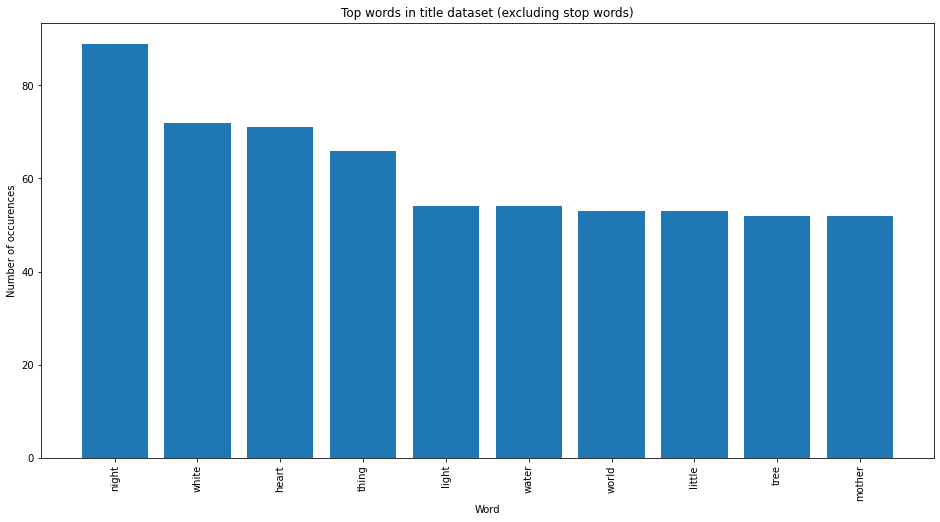

In [22]:
count_vectorizer = CountVectorizer(stop_words='english')
words, word_values = get_top_n_words(n_top_words=10,
                                     count_vectorizer=count_vectorizer, 
                                     text_data=df)

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(range(len(words)), word_values);
ax.set_xticks(range(len(words)));
ax.set_xticklabels(words, rotation='vertical');
ax.set_title('Top words in title dataset (excluding stop words)');
ax.set_xlabel('Word');
ax.set_ylabel('Number of occurences');
plt.show()

In [23]:
df.shape[0]

987

In [24]:
tagged = [TextBlob(df[i]).pos_tags for i in range(df.shape[0])]

text blob is used to part-of-speech tagging

In [25]:
tagged_df = pd.DataFrame({'tags':tagged})

word_counts = [] 
pos_counts = {}

for poem in tagged_df[u'tags']:
    word_counts.append(len(poem))
    for tag in poem:
        if tag[1] in pos_counts:
            pos_counts[tag[1]] += 1
        else:
            pos_counts[tag[1]] = 1
            
print('Total number of words: ', np.sum(word_counts))
print('Mean number of words per poem: ', np.mean(word_counts))

Total number of words:  19082
Mean number of words per poem:  19.333333333333332


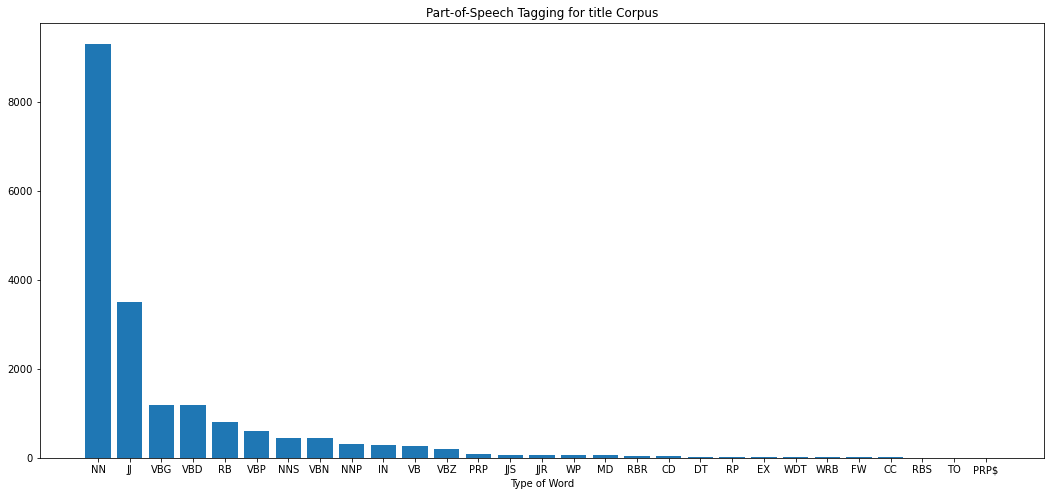

In [26]:
pos_sorted_types = sorted(pos_counts, key=pos_counts.__getitem__, reverse=True)
pos_sorted_counts = sorted(pos_counts.values(), reverse=True)

fig, ax = plt.subplots(figsize=(18,8))
ax.bar(range(len(pos_counts)), pos_sorted_counts);
ax.set_xticks(range(len(pos_counts)));
ax.set_xticklabels(pos_sorted_types);
ax.set_title('Part-of-Speech Tagging for title Corpus');
ax.set_xlabel('Type of Word');

text is converted to vector form

In [27]:
small_count_vectorizer = CountVectorizer(stop_words='english', max_features=4000)
small_text_sample = df.sample(n=980, random_state=0).values

print('Text before vectorization: {}'.format(small_text_sample[123]))

small_document_term_matrix = small_count_vectorizer.fit_transform(small_text_sample)

print('Text after vectorization: \n{}'.format(small_document_term_matrix[123]))

Text before vectorization: roomi house throughwe inhabit togetherheart nothing heart shalt hernext time herself—not trouble herleft curtain couch’s perfumeas brushed cornicewreath blossomed anew—yon lookingglass gleamed feather
Text after vectorization: 
  (0, 991)	1
  (0, 1051)	1
  (0, 481)	1
  (0, 3184)	1
  (0, 434)	1
  (0, 2480)	1
  (0, 3159)	1
  (0, 3218)	1
  (0, 2704)	1
  (0, 3371)	1
  (0, 1727)	1
  (0, 246)	1
  (0, 177)	1
  (0, 45)	1
  (0, 3951)	1
  (0, 888)	1
  (0, 732)	1


4 number of topics are selected as there are 4 type of Genre('Music', 'Death', 'Affection', 'Environment')

In [28]:
n_topics = 4

LSA model

In [29]:
lsa_model = TruncatedSVD(n_components=n_topics)
lsa_topic_matrix = lsa_model.fit_transform(small_document_term_matrix)

In [30]:
def get_keys(topic_matrix):
    '''
    returns an integer list of predicted topic 
    categories for a given topic matrix
    '''
    keys = topic_matrix.argmax(axis=1).tolist()
    return keys

def keys_to_counts(keys):
    '''
    returns a tuple of topic categories and their 
    accompanying magnitudes for a given list of keys
    '''
    count_pairs = Counter(keys).items()
    categories = [pair[0] for pair in count_pairs]
    counts = [pair[1] for pair in count_pairs]
    return (categories, counts)

In [56]:
lsa_keys = get_keys(lsa_topic_matrix)
lsa_categories, lsa_counts = keys_to_counts(lsa_keys)

In [57]:
def get_top_n_words(n, keys, document_term_matrix, count_vectorizer):
    '''
    returns a list of n_topic strings, where each string contains the n most common 
    words in a predicted category, in order
    '''
    top_word_indices = []
    for topic in range(n_topics):
        temp_vector_sum = 0
        for i in range(len(keys)):
            if keys[i] == topic:
                temp_vector_sum += document_term_matrix[i]
        temp_vector_sum = temp_vector_sum.toarray()
        top_n_word_indices = np.flip(np.argsort(temp_vector_sum)[0][-n:],0)
        top_word_indices.append(top_n_word_indices)   
    top_words = []
    for topic in top_word_indices:
        topic_words = []
        for index in topic:
            temp_word_vector = np.zeros((1,document_term_matrix.shape[1]))
            temp_word_vector[:,index] = 1
            the_word = count_vectorizer.inverse_transform(temp_word_vector)[0][0]
            topic_words.append(the_word)#.encode('ascii').decode('utf-8'))
        top_words.append(" ".join(topic_words))         
    return top_words

In [58]:
top_n_words_lsa = get_top_n_words(10, lsa_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lsa)):
    print("Topic {}: ".format(i+1), top_n_words_lsa[i])

Topic 1:  thing light water world tree love river little flower summer
Topic 2:  heart death think darkness thing bright hunger little word pulse
Topic 3:  night mother sleep time morning kissed black come cloud dream
Topic 4:  white green little deer footstep coming hollow come cometh beautiful


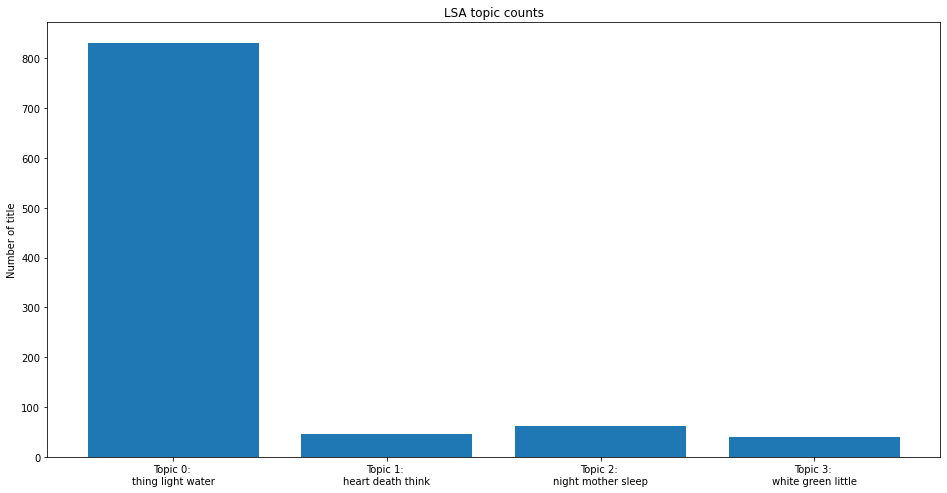

In [59]:
top_3_words = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lsa_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lsa_categories, lsa_counts);
ax.set_xticks(lsa_categories);
ax.set_xticklabels(labels);
ax.set_ylabel('Number of title');
ax.set_title('LSA topic counts');
plt.show()

In [60]:
tsne_lsa_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lsa_vectors = tsne_lsa_model.fit_transform(lsa_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 980 samples in 0.008s...
[t-SNE] Computed neighbors for 980 samples in 0.101s...
[t-SNE] Computed conditional probabilities for sample 980 / 980
[t-SNE] Mean sigma: 0.054066
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.421856
[t-SNE] KL divergence after 2000 iterations: 0.565559


In [61]:
colormap = np.array([
    "#1f77b4", "#aec7e8", "#ff7f0e", "#ffbb78", "#2ca02c",
    "#98df8a", "#d62728", "#ff9896", "#9467bd", "#c5b0d5",
    "#8c564b", "#c49c94", "#e377c2", "#f7b6d2", "#7f7f7f",
    "#c7c7c7", "#bcbd22", "#dbdb8d", "#17becf", "#9edae5" ])
colormap = colormap[:n_topics]

In [62]:
def get_mean_topic_vectors(keys, two_dim_vectors):
    '''
    returns a list of centroid vectors from each predicted topic category
    '''
    mean_topic_vectors = []
    for t in range(n_topics):
        articles_in_that_topic = []
        for i in range(len(keys)):
            if keys[i] == t:
                articles_in_that_topic.append(two_dim_vectors[i])    
        
        articles_in_that_topic = np.vstack(articles_in_that_topic)
        mean_article_in_that_topic = np.mean(articles_in_that_topic, axis=0)
        mean_topic_vectors.append(mean_article_in_that_topic)
    return mean_topic_vectors

In [63]:
top_3_words_lsa = get_top_n_words(3, lsa_keys, small_document_term_matrix, small_count_vectorizer)
lsa_mean_topic_vectors = get_mean_topic_vectors(lsa_keys, tsne_lsa_vectors)

plot = figure(title="t-SNE Clustering of {} LSA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lsa_vectors[:,0], y=tsne_lsa_vectors[:,1], color=colormap[lsa_keys])

for t in range(n_topics):
    label = Label(x=lsa_mean_topic_vectors[t][0], y=lsa_mean_topic_vectors[t][1], 
                  text=top_3_words_lsa[t], text_color=colormap[t])
    plot.add_layout(label)
    
show(plot)

LDA model

In [64]:
lda_model = LatentDirichletAllocation(n_components=n_topics, learning_method='online', 
                                          random_state=0, verbose=0)
lda_topic_matrix = lda_model.fit_transform(small_document_term_matrix)

In [65]:
lda_keys = get_keys(lda_topic_matrix)
lda_categories, lda_counts = keys_to_counts(lda_keys)

In [66]:
top_n_words_lda = get_top_n_words(10, lda_keys, small_document_term_matrix, small_count_vectorizer)

for i in range(len(top_n_words_lda)):
    print("Topic {}: ".format(i+1), top_n_words_lda[i])

Topic 1:  green water coming quiet place leaf moon glass night white
Topic 2:  light tree white child night water little green field thing
Topic 3:  love night heart hand river life lover light world think
Topic 4:  thing heart night woman mother white flower death come think


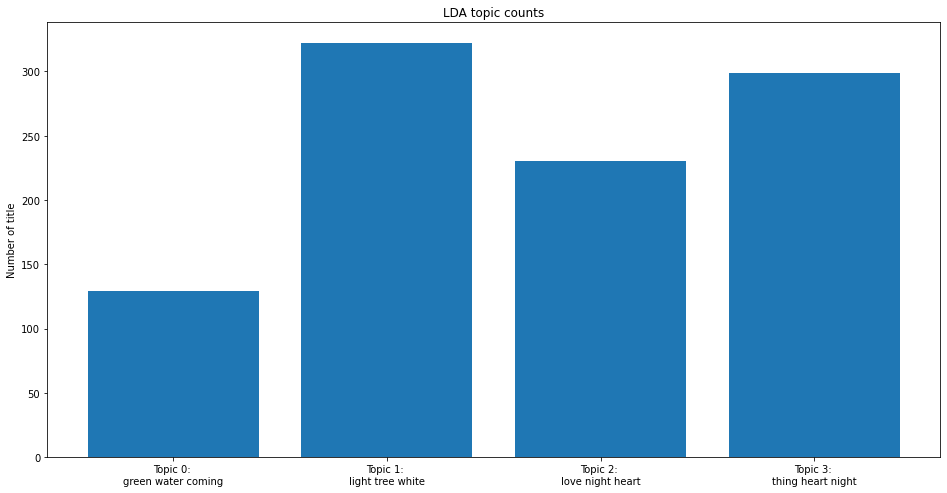

In [67]:
top_3_words = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
labels = ['Topic {}: \n'.format(i) + top_3_words[i] for i in lda_categories]

fig, ax = plt.subplots(figsize=(16,8))
ax.bar(lda_categories, lda_counts);
ax.set_xticks(lda_categories);
ax.set_xticklabels(labels);
ax.set_title('LDA topic counts');
ax.set_ylabel('Number of title');

In [68]:
tsne_lda_model = TSNE(n_components=2, perplexity=50, learning_rate=100, 
                        n_iter=2000, verbose=1, random_state=0, angle=0.75)
tsne_lda_vectors = tsne_lda_model.fit_transform(lda_topic_matrix)

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 980 samples in 0.003s...
[t-SNE] Computed neighbors for 980 samples in 0.082s...
[t-SNE] Computed conditional probabilities for sample 980 / 980
[t-SNE] Mean sigma: 0.012553
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.994831
[t-SNE] KL divergence after 2000 iterations: 0.200473


In [76]:
top_3_words_lda = get_top_n_words(3, lda_keys, small_document_term_matrix, small_count_vectorizer)
lda_mean_topic_vectors = get_mean_topic_vectors(lda_keys, tsne_lda_vectors)

plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), plot_width=700, plot_height=700)
plot.scatter(x=tsne_lda_vectors[:,0], y=tsne_lda_vectors[:,1], color=colormap[lda_keys])

for t in range(n_topics):
    label = Label(x=lda_mean_topic_vectors[t][0], y=lda_mean_topic_vectors[t][1], 
                  text=top_3_words_lda[t], text_color=colormap[t])
    plot.add_layout(label)

show(plot)

In [77]:
import gensim
from gensim import corpora
bigram = gensim.models.Phrases(document_cleaned, min_count=5, threshold=100) 
#trigram = gensim.models.Phrases(bigram[document_cleaned], threshold=100)
bigram_mod = gensim.models.phrases.Phraser(bigram)
def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]
data_words_bigrams = make_bigrams(document_cleaned)# Creating the term dictionary of our courpus, 
# where every unique term is assigned an index. 
dictionary = corpora.Dictionary(data_words_bigrams)# Converting list of documents (corpus) 
# into Document Term Matrix using dictionary prepared above.
doc_term_matrix = [dictionary.doc2bow(text) for text in data_words_bigrams]# Build the LDA model
from gensim.models import LdaModel
lda_model = LdaModel(corpus=doc_term_matrix,id2word=dictionary,num_topics=5,random_state=100,
                     passes=10,alpha=0.31,eta=0.9099999999999999)
lda_model.print_topics()

[(0,
  '0.002*"death" + 0.001*"white" + 0.001*"love" + 0.001*"water" + 0.001*"garden" + 0.001*"inside" + 0.001*"green" + 0.001*"sweet" + 0.001*"spring" + 0.001*"star"'),
 (1,
  '0.002*"thing" + 0.002*"tree" + 0.002*"night" + 0.001*"flower" + 0.001*"summer" + 0.001*"moon" + 0.001*"water" + 0.001*"field" + 0.001*"death" + 0.001*"earth"'),
 (2,
  '0.002*"night" + 0.002*"white" + 0.001*"light" + 0.001*"love" + 0.001*"dream" + 0.001*"star" + 0.001*"morning" + 0.001*"come" + 0.001*"child" + 0.001*"summer"'),
 (3,
  '0.003*"heart" + 0.002*"white" + 0.002*"little" + 0.002*"night" + 0.002*"leaf" + 0.002*"shall" + 0.002*"light" + 0.001*"black" + 0.001*"thing" + 0.001*"bird"'),
 (4,
  '0.002*"night" + 0.001*"mother" + 0.001*"window" + 0.001*"think" + 0.001*"little" + 0.001*"water" + 0.001*"river" + 0.001*"woman" + 0.001*"green" + 0.001*"world"')]

In [78]:
lda_df = lda_model.get_document_topics(doc_term_matrix,minimum_probability=0)
lda_df = pd.DataFrame(list(lda_df))
num_topics = lda_model.num_topics
lda_df.columns = ['Topic'+str(i) for i in range(num_topics)]
for i in range(len(lda_df.columns)):
    lda_df.iloc[:,i]=lda_df.iloc[:,i].apply(lambda x: x[1])
lda_df['Automated_topic_id'] =lda_df.apply(lambda x: np.argmax(x),axis=1)
lda_df.head()

,Topic0,Topic1,Topic2,Topic3,Topic4,Automated_topic_id
0,0.022655,0.022951,0.022422,0.023647,0.908326,4
1,0.042824,0.040291,0.038453,0.038202,0.840230,4
2,0.021084,0.019024,0.020135,0.920805,0.018952,3
3,0.021188,0.020927,0.915745,0.021155,0.020986,2
4,0.018516,0.019092,0.923539,0.019509,0.019344,2


In [79]:
# Compute Perplexity, a measure of how good the model is. lower the better.
from gensim.models import CoherenceModel
print('\nPerplexity: ', lda_model.log_perplexity(doc_term_matrix))# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lda_c_v = coherence_model_lda.get_coherence()
print('\nCoherence Score using c_v: ', coherence_lda_c_v)# Compute Coherence Score for lda model
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_words_bigrams, dictionary=dictionary, coherence='u_mass')
coherence_lda_u_mass = coherence_model_lda.get_coherence()
print('\nCoherence Score using u_mass: ', coherence_lda_u_mass)


Perplexity:  -9.159834273399634

Coherence Score using c_v:  0.36181899490409897

Coherence Score using u_mass:  -9.650443253376661


In [80]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

# feed the LDA model into the pyLDAvis instance
lda_viz = gensimvis.prepare(lda_model, doc_term_matrix, dictionary)

In [81]:
import warnings
warnings.filterwarnings('ignore')

In [82]:
lda_viz

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
3     -0.032437  0.010542       1        1  23.128835
2     -0.003131 -0.031529       2        1  21.414335
1      0.012477  0.007707       3        1  18.700683
4      0.010712  0.010397       4        1  18.550846
0      0.012378  0.002883       5        1  18.205301, topic_info=        Term       Freq      Total Category  logprob  loglift
399    white  23.000000  23.000000  Default  30.0000  30.0000
68     heart  22.000000  22.000000  Default  29.0000  29.0000
123   mother  12.000000  12.000000  Default  28.0000  28.0000
580     love  15.000000  15.000000  Default  27.0000  27.0000
740     tree  16.000000  16.000000  Default  26.0000  26.0000
...      ...        ...        ...      ...      ...      ...
246    thing   2.828873  21.453470   Topic5  -7.0631  -0.3226
146   little   2.688443  17.867192   Topic5  -7.1141  -0.1905
29     night   2.816195  28.456118   Topic5  -7.0676  -0.6095
1056  bright   2.280223   9.180105   Topic5  -7.2788   0.3107
249     body   2.269955   8.789554   Topic5  -7.2833   0.3497

[375 rows x 6 columns], token_table=      Topic      Freq   Term
term                        
2867      3  0.392918  added
961       1  0.203921  alive
961       2  0.203921  alive
961       3  0.203921  alive
961       4  0.203921  alive
...     ...       ...    ...
321       1  0.132553  young
321       2  0.132553  young
321       3  0.132553  young
321       4  0.397659  young
321       5  0.265106  young

[724 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[4, 3, 2, 5, 1])

In [83]:
from gensim.models import LsiModel
lsi_model = LsiModel(corpus=doc_term_matrix, num_topics=4, id2word=dictionary)
lsi_model.print_topics(num_topics=10,num_words=10)
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [84]:
# Compute Coherence Score for llsi model
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=data_words_bigrams, dictionary=dictionary, coherence='c_v')
coherence_lsi_c_v = coherence_model_lsi.get_coherence()
print('\nCoherence Score for LSI using c_v: ', coherence_lsi_c_v)# Compute Coherence Score for llsi model
coherence_model_lsi = CoherenceModel(model=lsi_model, texts=data_words_bigrams, dictionary=dictionary, coherence='u_mass')
coherence_lsi_u_mass = coherence_model_lsi.get_coherence()
print('\nCoherence Score for LSI using u_mass: ', coherence_lsi_u_mass)


Coherence Score for LSI using c_v:  0.45246471026140256

Coherence Score for LSI using u_mass:  -10.722002809875153


Compare two models

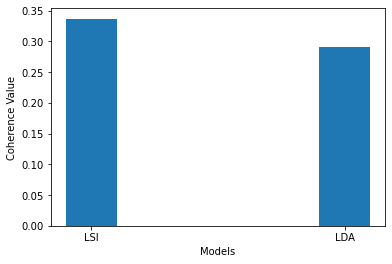

In [85]:
from gensim.models import CoherenceModel
lda_topics = [[word for word, prob in topic] for topicid, topic in lda_model.show_topics(formatted=False)]
lsi_topics = [[word for word, prob in topic] for topicid, topic in lsi_model.show_topics(formatted=False)]
lsi_coherence = CoherenceModel(topics=lsi_topics, texts=data_words_bigrams, dictionary=dictionary, window_size=10).get_coherence()
lda_coherence = CoherenceModel(topics=lda_topics, texts=data_words_bigrams, dictionary=dictionary, window_size=10).get_coherence()
import numpy as np
def topic_model_graph(coherences, indices):
    """
    Function to plot bar graph.
    
    coherences: list of coherence values
    indices: Indices to be used to mark bars. Length of this and coherences should be equal.
    """
    assert len(coherences) == len(indices)
    n = len(coherences)
    x = np.arange(n)
    plt.bar(x, coherences, width=0.2, tick_label=indices, align='center')
    plt.xlabel('Models')
    plt.ylabel('Coherence Value')
topic_model_graph([lsi_coherence, lda_coherence],
                   ['LSI',  'LDA'])